# Worked on two datasets 1) beer dataset , 2) Customer Spends dataset. 



# Creating Product Segments using Clustering 

__Dataset : Beer Dataset__

A company would like to enter the market with a new beer brand. Before, it decides the kind of beer it will launch, it must understand what kinds of products already exist in the market & what kinds of segments the products address. To understand the segments, the company collects specification of few samples of beer brands. Beer dataset consists of 20 records. Each instance/ observation belongs to a beer brand & it contains information about the calories, alcohol content, sodium content & the cost



__Importing Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
beer = pd.read_csv('beer.csv')
beer.info()
beer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   calories  20 non-null     int64  
 2   sodium    20 non-null     int64  
 3   alcohol   20 non-null     float64
 4   cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


Each observation belongs to a beer brand and it contains information about the calories, alcohol , sodium content and the cost. 
Before clustering the brands in segments , the features need to be normalized as there are on different scales. 

__Normalizing Beer Dataset__

In [4]:
scaled_beer = StandardScaler().fit_transform(beer[['calories','sodium','alcohol','cost']])
scaled_beer[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

As there are four features it is not possible to plot and visualize them to understand how many clusters may exist. 
We need to use two techniques for discovering the possible number of clusters. 
1. Dendogram 
2. Elbow Method

__Using Dendogram__

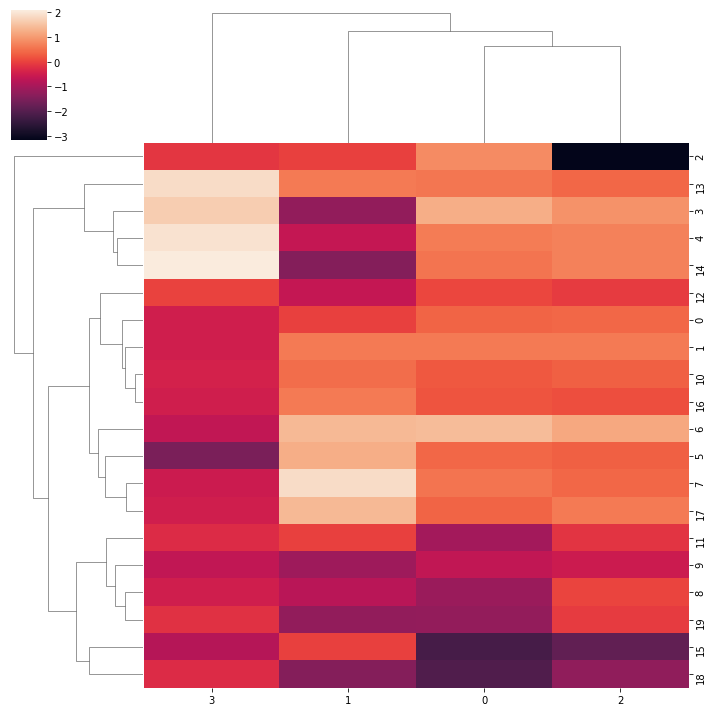

In [5]:
sns.clustermap(scaled_beer)

__Interpretation:__ 

- As shown in above figure dendogram records the observations based on how close they are to each other.
- The left side of the dendogram depicts the relative distance between nodes. 

__Display similar & dis-similar instances__

In [6]:
print("Similar Instances     :\n",beer.loc[[10,16]])

Similar Instances     :
      name  calories  sodium  alcohol  cost
10  Coors       140      18      4.6  0.44
16  Hamms       139      19      4.4  0.43


__Interpretation:__ 
- It can be observed that both the beer brands coors and hams are very similar. 

In [7]:
print("Dis-similar Instances :\n",beer.loc[[2,18]])

Dis-similar Instances :
                    name  calories  sodium  alcohol  cost
2             Lowenbrau       157      15      0.9  0.48
18  Olympia_Goled_Light        72       6      2.9  0.46


__Interpretation:__
- Brands 2 and 18 are different as their distance is the highest, they are situated at two extreme on the dendogram

__Using Elbow Method__

Elbow curve method considers the percentage of variance explained as a function of the number of clusters. The optimal number of clusters is chosen in such a way that adding another cluster does not change the variance. 

In [8]:
cluster_error = []
cluster_range = range(1,10)
for i in cluster_range:
    clust = KMeans(i).fit(scaled_beer)
    cluster_error.append(clust.inertia_)

Text(0.5, 1.0, 'Elbow Diagram')

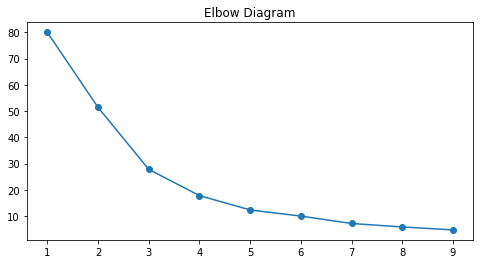

In [10]:

plt.figure(figsize=(8,4))
plt.plot(cluster_range, cluster_error, marker = "o")
plt.title("Elbow Diagram")

__Interpretation:__
- The figure indicates that the elbow point is at 3, which indicates that there are three clusters in the dataset. 

__Creating Clusters__

Setting k to 3 for running KMeans Algorithm and creating a new column __"clusterid"__ to capture the cluster number it is assigned to. 

In [12]:
clust2 = KMeans(3, random_state = 42).fit(scaled_beer)
beer["clusterid"] = clust2.labels_ 
beer.head()

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2


__Interpreting the clusters__

- The three clusters are created and numbered as cluster 0 , cluster 1 and cluster 2 . 
- Printing each cluster and interpreting the characteristic of each cluster and filtering the records by clusterid 

In [13]:
#Print dimensions of each new cluster created

print("Cluster 0 Dimensions: \t",beer[beer.clusterid==0].shape)
print("Cluster 1 Dimensions: \t",beer[beer.clusterid==1].shape)
print("Cluster 2 Dimensions: \t",beer[beer.clusterid==2].shape)

Cluster 0 Dimensions: 	 (8, 6)
Cluster 1 Dimensions: 	 (8, 6)
Cluster 2 Dimensions: 	 (4, 6)


__Cluster 0:__

In [14]:
beer[beer.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


__Interpretation:__
In cluster 0, all the beers with low calories and sodium content are grouped together. 

__Cluster 1:__

In [15]:
beer[beer.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


__Interpretation:__
In cluster 1 beers with medium alcohol content and medium cost are grouped together.

__Cluster 2:__

In [16]:
beer[beer.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


__Interpretation:__
- These are expensive beers with high alcohol content. 
- The sodium content is low 
- The costs are high

__Hierarchial Clustering__

In [17]:
h_clusters = AgglomerativeClustering(3).fit(scaled_beer)
beer["h_clusterid"] = h_clusters.labels_ 
beer[0:5]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,1,1
1,Schlitz,151,19,4.9,0.43,1,1
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2


__Interpretation__
- Creating lcusters using Agglomerative clustering and storing the new cluster labels in h_clusterid variable

__Print dimensions of each new cluster created__

In [18]:
print("Cluster 0 Dimensions: \t",beer[beer.h_clusterid==0].shape)
print("Cluster 1 Dimensions: \t",beer[beer.h_clusterid==1].shape)
print("Cluster 2 Dimensions: \t",beer[beer.h_clusterid==2].shape)

Cluster 0 Dimensions: 	 (8, 7)
Cluster 1 Dimensions: 	 (8, 7)
Cluster 2 Dimensions: 	 (4, 7)


__Comparing the clusters created by KMeans and Hierarchical Clustering__

In [19]:
print("Cluster 0\n",beer[beer.h_clusterid==0],"\n")
print("Cluster 1\n",beer[beer.h_clusterid==1],"\n")
print("Cluster 2\n",beer[beer.h_clusterid==2],"\n")

Cluster 0
                    name  calories  sodium  alcohol  cost  clusterid  \
2             Lowenbrau       157      15      0.9  0.48          0   
8           Miller_Lite        99      10      4.3  0.43          0   
9       Budweiser_Light       113       8      3.7  0.40          0   
11          Coors_Light       102      15      4.1  0.46          0   
12       Michelob_Light       135      11      4.2  0.50          0   
15    Pabst_Extra_Light        68      15      2.3  0.38          0   
18  Olympia_Goled_Light        72       6      2.9  0.46          0   
19        Schlitz_Light        97       7      4.2  0.47          0   

    h_clusterid  
2             0  
8             0  
9             0  
11            0  
12            0  
15            0  
18            0  
19            0   

Cluster 1
                     name  calories  sodium  alcohol  cost  clusterid  \
0              Budweiser       144      15      4.7  0.43          1   
1                Schlitz      

__Interpretation:__
- Both the clustering algorithms have created similar clusters. Only cluster ids have changed. 

#  Product Segmentation of customerspends.csv 

An online grocery store has captured amount spent per annum (in Indian Rupee) by 20 customers on apparel and beauty and healthcare products and given in the file customerspends.csv it contains the following records. 

- Customer: Customer ID 
- Apparel: Amount spent in apparel products
- Beauty and Healthcare: Amount spent in beauty and healthcare products 

__Reading the CustomerSpends Dataset__

In [21]:
customers = pd.read_csv('customerspends.csv')
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer               20 non-null     int64  
 1   Apparel                20 non-null     float64
 2   Beauty and Healthcare  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


__Normalizing Features__

In [22]:
scaled_customers = StandardScaler().fit_transform(customers[['Customer','Apparel','Beauty and Healthcare']])
scaled_customers[0:5]

array([[-1.64750894,  0.892371  , -1.26688022],
       [-1.47408695,  0.20647107, -0.59775334],
       [-1.30066495, -0.96318111,  1.22840542],
       [-1.12724296,  2.06085469, -1.11353864],
       [-0.95382097, -0.85801758,  1.63266957]])

__Using Dendogram__

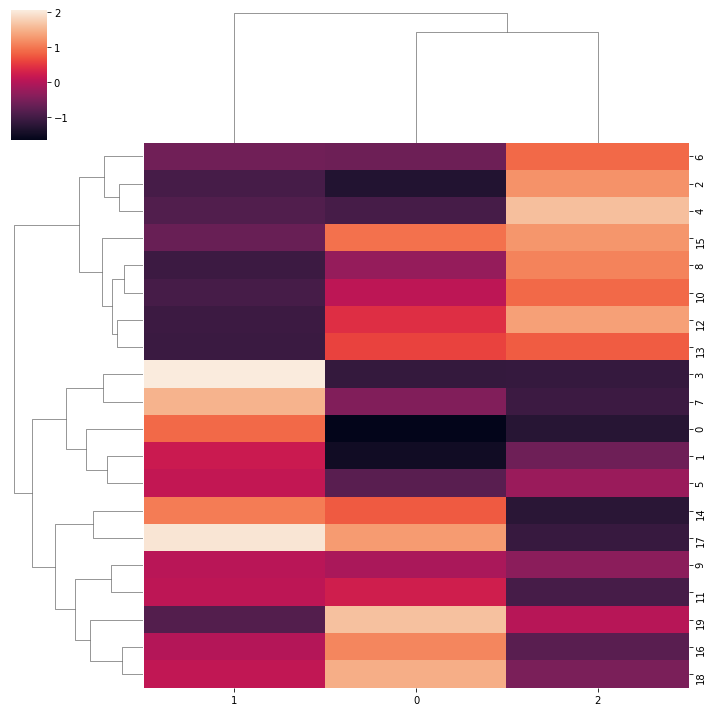

In [23]:
sns.clustermap(scaled_customers)

In [24]:
print("Similar Instances     :\n",customers.loc[[12,13]])

Similar Instances     :
     Customer  Apparel  Beauty and Healthcare
12        13     4.40                   19.4
13        14     4.25                   15.5


__Interpretation:__ 
- It can be observed that both customer ids are very similar. 

In [25]:
print("Dis-similar Instances :\n",customers.loc[[6,18]])

Dis-similar Instances :
     Customer  Apparel  Beauty and Healthcare
6          7      8.5                  16.20
18        19     14.4                   6.28


__Interpretation:__
- CustomerIDs 7 and 19 are different as their distance is the highest, they are situated at two extreme on the dendogram

__Elbow Method__

In [26]:
cluster_error = []
cluster_range = range(1,10)
for i in cluster_range:
    clust = KMeans(i).fit(scaled_customers)
    cluster_error.append(clust.inertia_)  

Text(0.5, 1.0, 'Elbow Diagram')

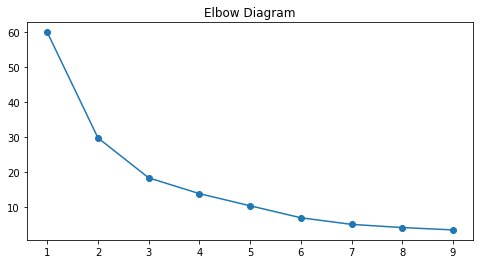

In [27]:
plt.figure(figsize=(8,4))
plt.plot(cluster_range, cluster_error, marker = "o")
plt.title("Elbow Diagram")

**Interpretation**

- Elbow point is at 2
- Indicates that there might be 2 clusters existing in the dataset 

__Creating Clusters__

Setting k to 2 for running KMeans Algorithm and creating a new column __"clusterid"__ to capture the cluster number it is assigned to. 

In [28]:
clust2 = KMeans(2, random_state = 42).fit(scaled_customers)
customers["clusterid"] = clust2.labels_ 
customers.head()

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.10,0.7,1
1,2,15.23,5.5,1
2,3,5.22,18.6,0
3,4,31.10,1.8,1
4,5,6.12,21.5,0


In [29]:
print("Cluster 0 Dimensions: \t",customers[customers.clusterid==0].shape)
print("Cluster 1 Dimensions: \t",customers[customers.clusterid==1].shape)

Cluster 0 Dimensions: 	 (9, 4)
Cluster 1 Dimensions: 	 (11, 4)


__Interpreting the clusters__

- The two clusters are created and numbered as cluster 0 and cluster 1. 
- Printing each cluster and interpreting the characteristic of each cluster and filtering the records by clusterid 

__Cluster: 0__

In [30]:
print("Cluster 0\n",customers[customers.clusterid==0],"\n")

Cluster 0
     Customer  Apparel  Beauty and Healthcare  clusterid
2          3     5.22                  18.60          0
4          5     6.12                  21.50          0
6          7     8.50                  16.20          0
8          9     4.34                  17.70          0
10        11     5.20                  16.20          0
12        13     4.40                  19.40          0
13        14     4.25                  15.50          0
15        16     7.90                  18.80          0
19        20     6.25                   9.98          0 



__Interpretation:__
In cluster 0, all the customers 3 to 20 spent low on apparel and spent high on BeautyandHealthcare are grouped together.

__Cluster: 1__

In [31]:
print("Cluster 1\n",customers[customers.clusterid==1],"\n")

Cluster 1
     Customer  Apparel  Beauty and Healthcare  clusterid
0          1    21.10                   0.70          1
1          2    15.23                   5.50          1
3          4    31.10                   1.80          1
5          6    14.50                   8.20          1
7          8    26.50                   2.20          1
9         10    13.75                   7.30          1
11        12    14.20                   2.90          1
14        15    22.30                   0.90          1
16        17    13.40                   4.20          1
17        18    30.60                   1.90          1
18        19    14.40                   6.28          1 



__Interpretation:__
In cluster 1, all the customers 1 to 19 are high amount spent on apparel and low amount spent on BeautyandHealthcare are grouped together. 

__Hierarchial Clustering__

In [32]:
h_clusters = AgglomerativeClustering(2).fit(scaled_customers)
customers["h_clusterid"] = h_clusters.labels_ 
customers[0:5]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
0,1,21.10,0.7,1,0
1,2,15.23,5.5,1,0
2,3,5.22,18.6,0,1
3,4,31.10,1.8,1,0
4,5,6.12,21.5,0,1


In [33]:
print("Cluster 0 Dimensions: \t",customers[customers.h_clusterid==0].shape)
print("Cluster 1 Dimensions: \t",customers[customers.h_clusterid==1].shape)

Cluster 0 Dimensions: 	 (12, 5)
Cluster 1 Dimensions: 	 (8, 5)


In [34]:
print("Cluster 0\n",customers[customers.h_clusterid==0],"\n")
print("Cluster 1\n",customers[customers.h_clusterid==1],"\n")

Cluster 0
     Customer  Apparel  Beauty and Healthcare  clusterid  h_clusterid
0          1    21.10                   0.70          1            0
1          2    15.23                   5.50          1            0
3          4    31.10                   1.80          1            0
5          6    14.50                   8.20          1            0
7          8    26.50                   2.20          1            0
9         10    13.75                   7.30          1            0
11        12    14.20                   2.90          1            0
14        15    22.30                   0.90          1            0
16        17    13.40                   4.20          1            0
17        18    30.60                   1.90          1            0
18        19    14.40                   6.28          1            0
19        20     6.25                   9.98          0            0 

Cluster 1
     Customer  Apparel  Beauty and Healthcare  clusterid  h_clusterid
2         

__Interpretation:__
- Both the clustering algorithms have created similar clusters. Only cluster ids have changed. 

__The End__